In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

In [33]:
data =pd.read_csv('train.csv')
data

,Date,Open,High,Low,Adj Close,Volume,sma,rsi,ma,std_dev,upperband,lowerband,EMA12,EMA26,MACD,Signal_Line,MACD_Histogram,Close
0,2008-02-26,61.184048,61.877071,60.887035,34.932198,59821230,58.0407,65.7439,58.0407,3.8147,65.6701,50.4113,60.024440,58.772403,1.252037,1.071421,0.180617,61.778069
1,2008-02-27,62.174080,62.966106,62.075077,35.603970,94417042,58.7337,76.5151,58.7337,3.3348,65.4033,52.0641,60.477004,59.083048,1.393957,1.135928,0.258029,62.966106
2,2008-02-29,61.976074,62.867104,60.986038,34.484344,64072603,59.2584,69.6296,59.2584,2.7428,64.7440,53.7728,60.555317,59.224010,1.331307,1.175004,0.156303,60.986038
3,2008-03-03,59.500992,60.095009,59.401985,33.980511,47462048,59.6049,63.8889,59.6049,2.3407,64.2863,54.9235,60.484501,59.288528,1.195972,1.179197,0.016775,60.095009
4,2008-03-04,59.500992,62.372086,59.500992,35.212097,74207617,59.9713,64.4531,59.9713,2.1379,64.2471,55.6955,60.759667,59.509607,1.250060,1.193370,0.056690,62.273083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,2024-06-24,958.000000,960.000000,940.000000,940.000000,66391994,896.5500,62.2896,896.5500,49.3318,995.2136,797.8864,930.259943,894.505273,35.754671,30.524659,5.230011,940.000000
4009,2024-06-25,925.000000,945.000000,923.000000,945.000000,57368432,900.3500,62.6667,900.3500,50.0203,1000.3906,800.3094,932.527644,898.245623,34.282021,31.276132,3.005890,945.000000
4010,2024-06-26,951.000000,960.000000,951.000000,960.000000,44967166,905.1000,65.2733,905.1000,50.9880,1007.0760,803.1240,936.754161,902.820021,33.934139,31.807733,2.126406,960.000000
4011,2024-06-27,951.000000,961.000000,949.000000,960.000000,39729446,910.2500,66.9967,910.2500,51.0757,1012.4014,808.0986,940.330444,907.055575,33.274868,32.101160,1.173708,960.000000


In [34]:
# features=data.columns[1:-1]
features=['Open', 'High', 'Low', 'Adj Close', 'EMA12']
features

['Open', 'High', 'Low', 'Adj Close', 'EMA12']

In [4]:
def Linear_regression(data, features):
    # 創建目標變量
    tdf = pd.DataFrame()
    tdf['Target'] = data['Close']

    # 選擇特徵
    x = data[features].values
    y = tdf['Target'].values

    # 分割資料集為訓練集、驗證集和測試集
    x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.5, random_state=39830)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=39830)

    # 標準化特徵和目標變量
    std_x = StandardScaler()
    x_train = std_x.fit_transform(x_train)
    x_val = std_x.transform(x_val)
    x_test = std_x.transform(x_test)

    std_y = StandardScaler()
    y_train = std_y.fit_transform(y_train.reshape(-1, 1))
    y_val = std_y.transform(y_val.reshape(-1, 1))
    y_test = std_y.transform(y_test.reshape(-1, 1))

    # 訓練線性回歸模型
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    print('權重值：{}'.format(lr.coef_))
    print('偏置值：{}'.format(lr.intercept_))

    # 在測試集上進行預測
    y_predict = std_y.inverse_transform(lr.predict(x_test))
    y_real = std_y.inverse_transform(y_test)

    # 計算測試集的平均方差和R-squared
    merror = mean_squared_error(y_real, y_predict)
    print('測試集平均方差：{}'.format(merror))

    r2 = r2_score(y_real, y_predict)
    print("R-squared score (測試集):", r2)

    # 使用最新資料進行預測
    x_last_predict = x[-1].reshape(1, -1)
    y_last_predict = std_y.inverse_transform(lr.predict(std_x.transform(x_last_predict)))
    print('預測值：', y_last_predict[0].round(4))

    # 散布圖
    plt.figure(figsize=(12, 6))
    plt.scatter(y_real, y_predict, color='blue', label='Prediction')
    plt.plot(y_real, y_real, color='red', label='Actual')
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title('Real vs Predicted Values (Test Set)')
    plt.legend()
    plt.show()

    # 在驗證集上進行評估
    y_val_predict = std_y.inverse_transform(lr.predict(x_val))
    y_val_real = std_y.inverse_transform(y_val)
    val_merror = mean_squared_error(y_val_real, y_val_predict)
    print('驗證集平均方差：{}'.format(val_merror))

    val_r2 = r2_score(y_val_real, y_val_predict)
    print("R-squared score (驗證集):", val_r2)

    plt.figure(figsize=(12, 6))
    plt.scatter(y_val_real, y_val_predict, color='blue', label='Prediction')
    plt.plot(y_val_real, y_val_real, color='red', label='Actual')
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title('Real vs Predicted Values (Val Set)')
    plt.legend()
    plt.show()

    # 交叉驗證
    kf = KFold(n_splits=5, shuffle=True, random_state=39830)
    cv_scores = cross_val_score(lr, std_x.transform(x), std_y.transform(y.reshape(-1, 1)).ravel(), cv=kf, scoring='neg_mean_squared_error')
    
    # 因為cross_val_score返回的是負均方誤差，我們需要取負數來得到正的均方誤差
    mean_cv_mse = -cv_scores.mean()
    print('交叉驗證的均方誤差：{}'.format(mean_cv_mse))

    # 可以計算每個fold的R-squared分數
    cv_r2_scores = cross_val_score(lr, std_x.transform(x), std_y.transform(y.reshape(-1, 1)).ravel(), cv=kf, scoring='r2')
    print("交叉驗證的R-squared scores：{}".format(cv_r2_scores))
    print("交叉驗證的平均R-squared score：{}".format(cv_r2_scores.mean()))

    # # 時間折線圖
    # plt.plot(data['Date'], y, color='blue', label='Actual Close Price')
    # plt.plot(data['Date'], std_y.inverse_transform(lr.predict(std_x.transform(x))), color='red', linestyle='--', label='Predicted Close Price')
    # plt.xlabel('Time')
    # plt.ylabel('Close Price')
    # plt.title('Actual vs Predicted Close Price Over Time')
    # plt.legend()
    # plt.tight_layout()
    # plt.show()

    return merror, y_last_predict[0], val_merror, lr, std_x, std_y

權重值：[[-0.55843944  0.7596124   0.81533121  0.03049213 -0.04704659]]
偏置值：[6.51870414e-17]
測試集平均方差：2.252512146607811
R-squared score (測試集): 0.9999331236949114
預測值： [593.2947]


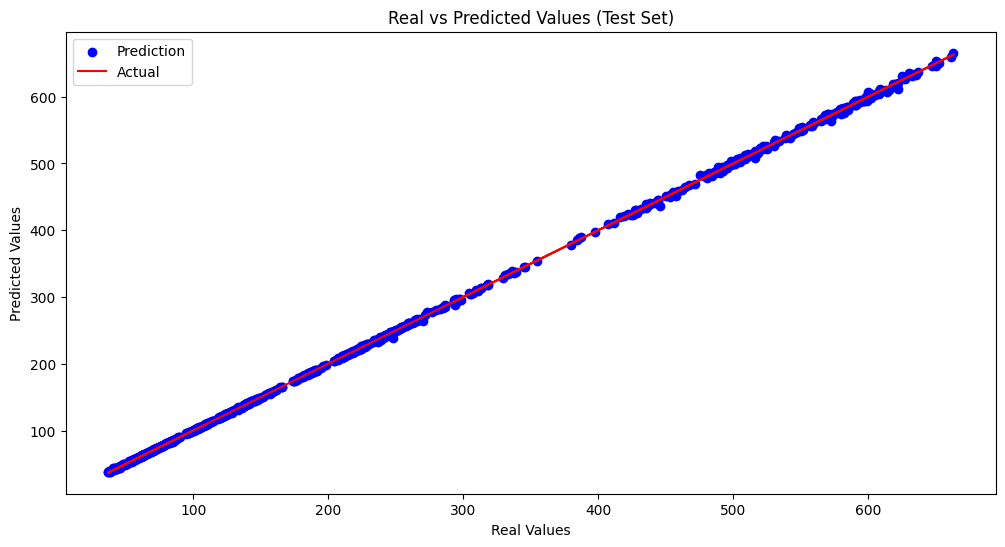

驗證集平均方差：2.9844124790341775
R-squared score (驗證集): 0.9999076370870806


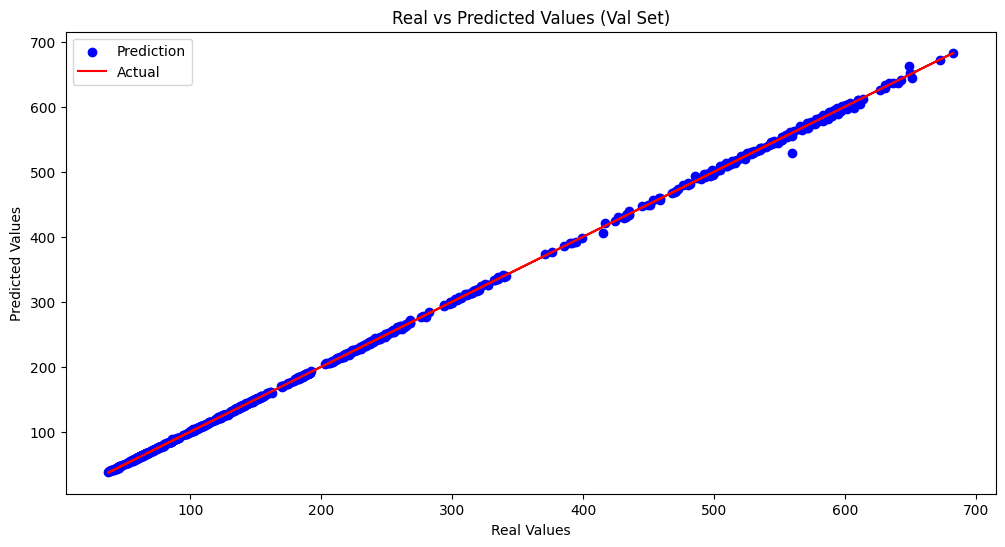

交叉驗證的均方誤差：6.987362748039902e-05
交叉驗證的R-squared scores：[0.99994308 0.99988386 0.99994602 0.99992889 0.99994662]
交叉驗證的平均R-squared score：0.9999296931474028
新的測試集平均方差：22.84302804431503
R-squared score (新的測試集): 0.9832058724416343
預測值： [422.2661]


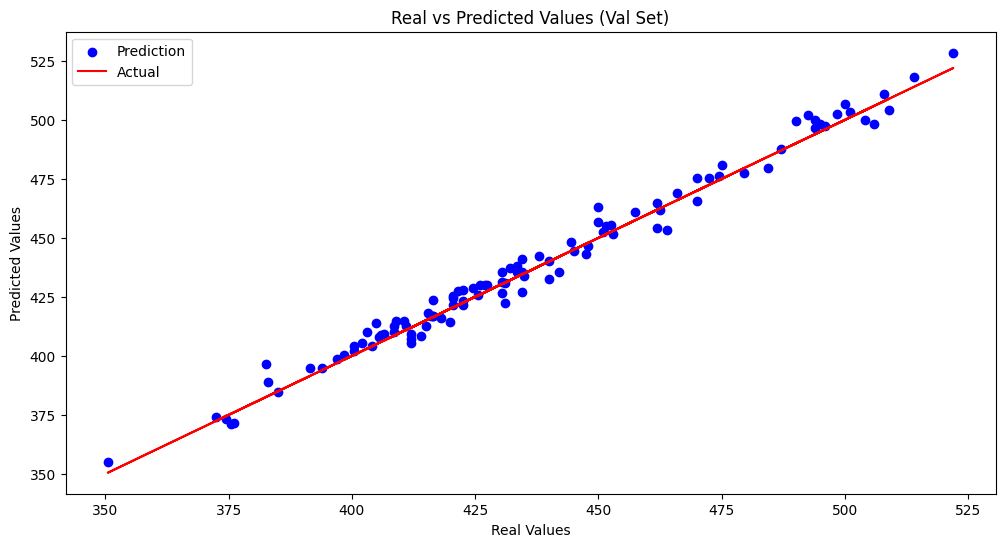

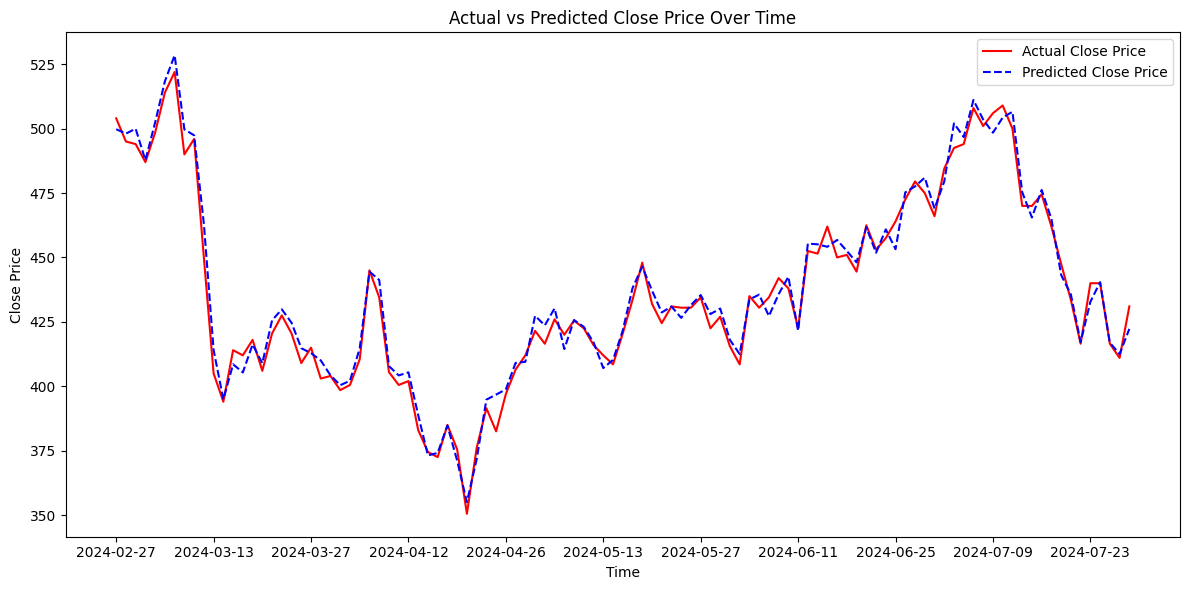

In [5]:
# 使用模型進行預測並繪圖
mse, pre, valmse, model, std_x, std_y = Linear_regression(data, features)

# 載入測試數據
test_data = pd.read_csv("test5.csv")
test_x = test_data[features].values
test_y = test_data['Close'].values

# 使用訓練集的標準化器進行變換
test_x = std_x.transform(test_x)
test_y = std_y.transform(test_y.reshape(-1, 1))

# 在新的測試集上進行預測
y_test_predict = std_y.inverse_transform(model.predict(test_x))
y_test_real = std_y.inverse_transform(test_y)

# 計算測試集的平均方差
test_merror = mean_squared_error(y_test_real, y_test_predict)
print('新的測試集平均方差：{}'.format(test_merror))
test_r2 = r2_score(y_test_real, y_test_predict)
print("R-squared score (新的測試集):", test_r2)

# 使用最新資料進行預測
x_last_predict = test_data[features].values[-1].reshape(1, -1)
y_last_predict = std_y.inverse_transform(model.predict(std_x.transform(x_last_predict)))
print('預測值：', y_last_predict[0].round(4))

# 散點圖
plt.figure(figsize=(12, 6))
plt.scatter(y_test_real, y_test_predict, color='blue', label='Prediction')
plt.plot(y_test_real, y_test_real, color='red', label='Actual')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values (Val Set)')
plt.legend()
plt.show()

# 時間折線圖
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'].values, color='red', label='Actual Close Price')
plt.plot(test_data['Date'], std_y.inverse_transform(model.predict(std_x.transform(test_data[features].values))), color='blue', linestyle='--', label='Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price Over Time')
xticks = plt.gca().get_xticks()  # 獲取當前的x軸刻度
plt.gca().set_xticks(xticks[::len(xticks)//10])  # 每隔一定數量顯示一個標籤
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
def Decision_tree_Regressor(data,feature):
    
    tdf = pd.DataFrame()
    tdf['Target'] = data['Close']

    x = data[feature].values  # 排除第一列（日期）和最后两列（Target和Close）
    y = tdf['Target'].values  # 使用 'Target' 作为目标变量

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=39830)

    dec = DecisionTreeRegressor(random_state=39830)
    dec.fit(x_train, y_train)

    # 在测试集上评估模型
    y_pred = dec.predict(x_test)
    mse = round(mean_squared_error(y_test, y_pred),4)
    r2 = round(r2_score(y_test, y_pred),4)

    x_last_predict = data.iloc[-1][feature].values.reshape(1, -1)
    y_last_predict = dec.predict((x_last_predict))

    #誤差 1%
    tolerance_percentage = 0.01 
    # 計算容忍度閾值
    tolerance_threshold = tolerance_percentage * np.abs(y_test)
    # 計算絕對誤差
    absolute_errors = np.abs(y_pred - y_test)
    # 計算在容忍度範圍內的正確比率
    correct_within_tolerance = np.mean(absolute_errors <= tolerance_threshold)


    return mse,r2,round(y_last_predict[0],4),tolerance_percentage,correct_within_tolerance

X_train shape: (3201, 10, 1), dtype: float32
y_train shape: (3201,), dtype: float32
X_test shape: (801, 10, 1), dtype: float32
y_test shape: (801,), dtype: float32
Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0078 - val_loss: 0.0063
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4926e-05 - val_loss: 0.0041
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9119e-05 - val_loss: 0.0023
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7085e-05 - val_loss: 0.0017
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4996e-05 - val_loss: 0.0012
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2493e-05 - val_loss: 8.9334e-04
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0109e-05 - val_loss: 6.6317e-04
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0280e-06 - val_loss: 6.4882e-04
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4315e-06 - val_loss: 6.1116e-04
Epoch 10/100
81/81 ━━━━

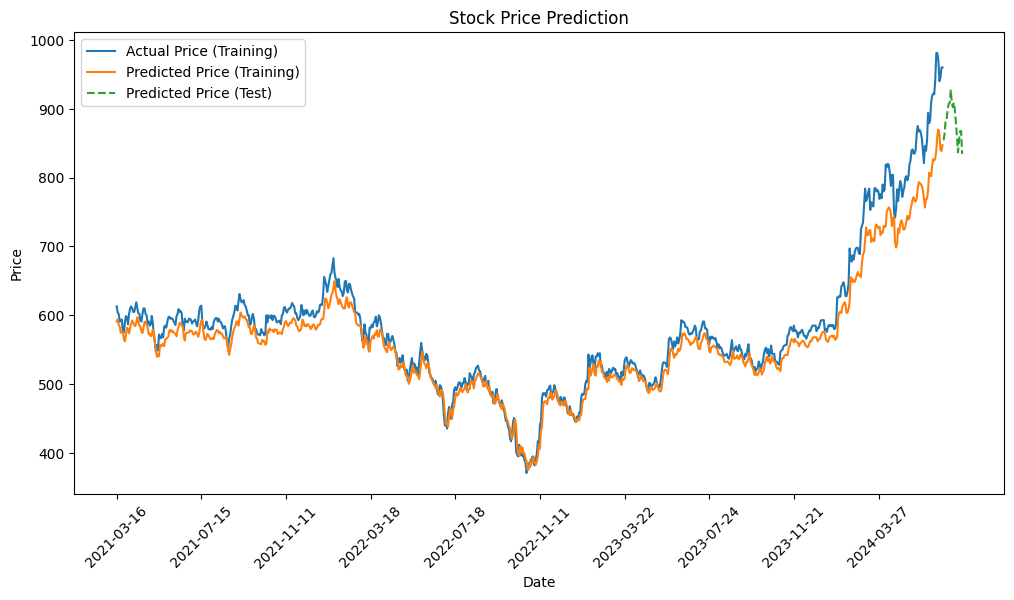

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. 数据准备
target_column = 'Close'
Tdata = data
Ydata = data[[target_column]]

# 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Ydata)

# 创建时间序列数据
def create_dataset(Ydata, time_step=5):
    X, y = [], []
    for i in range(len(Ydata) - time_step - 1):
        X.append(Ydata[i:(i + time_step), 0])
        y.append(Ydata[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# 重新调整 X 形状以适应 RNN 输入
X = X.reshape(X.shape[0], X.shape[1], 1)

# 划分数据集
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 确保 X_train 和 y_train 是 numpy 数组，并处理 NaNs
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

# 确认数据维度
print(f'X_train shape: {X_train.shape}, dtype: {X_train.dtype}')
print(f'y_train shape: {y_train.shape}, dtype: {y_train.dtype}')
print(f'X_test shape: {X_test.shape}, dtype: {X_test.dtype}')
print(f'y_test shape: {y_test.shape}, dtype: {y_test.dtype}')

# 2. 构建 RNN 模型
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # 使用 Input 层指定输入形状
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 手动分割验证集
val_split = int(0.2 * len(X_train))
X_val, X_train_new = X_train[-val_split:], X_train[:-val_split]
y_val, y_train_new = y_train[-val_split:], y_train[:-val_split]

# 训练模型
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_new, y_train_new,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# 3. 评估模型
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 加载 test_data 并进行预测
test_data = pd.read_csv("test.csv")  # 确保数据文件存在并正确加载
test_Ydata = test_data[[target_column]]
scaled_test_data = scaler.transform(test_Ydata)

# 创建时间序列数据
X_test_data, _ = create_dataset(scaled_test_data, time_step)
X_test_data = X_test_data.reshape(X_test_data.shape[0], X_test_data.shape[1], 1)

# 预测 test_data
predicted_test_data = model.predict(X_test_data)
predicted_test_data = scaler.inverse_transform(predicted_test_data)

# 可视化结果
plt.figure(figsize=(12, 6))

# 对训练数据和测试数据进行绘图
# 确保日期范围与预测结果长度一致
date_range_train = Tdata['Date'][time_step + len(y_train):].reset_index(drop=True)
date_range_test = test_data['Date'][time_step:].reset_index(drop=True)

# 修正长度匹配问题
min_len_train = min(len(date_range_train), len(actual))
min_len_test = min(len(date_range_test), len(predicted_test_data))

plt.plot(date_range_train[:min_len_train], actual[:min_len_train], label='Actual Price (Training)')
plt.plot(date_range_train[:min_len_train], predicted[:min_len_train], label='Predicted Price (Training)')
plt.plot(date_range_test[:min_len_test], predicted_test_data[:min_len_test], label='Predicted Price (Test)', linestyle='--')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # 使日期标签更易读
xticks = plt.gca().get_xticks()  # 獲取當前的x軸刻度
plt.gca().set_xticks(xticks[::len(xticks)//10])  # 每隔一定數量顯示一個標籤
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. 数据准备
target_column = 'Close'
Tdata = data
Ydata = data[[target_column]]

# 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Ydata)

# 创建时间序列数据
def create_dataset(Ydata, time_step=5):
    X, y = [], []
    for i in range(len(Ydata) - time_step - 1):
        X.append(Ydata[i:(i + time_step), 0])
        y.append(Ydata[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# 重新调整 X 形状以适应 LSTM 输入
X = X.reshape(X.shape[0], X.shape[1], 1)

# 划分数据集
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 确保 X_train 和 y_train 是 numpy 数组，并处理 NaNs
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

# 确认数据维度
print(f'X_train shape: {X_train.shape}, dtype: {X_train.dtype}')
print(f'y_train shape: {y_train.shape}, dtype: {y_train.dtype}')
print(f'X_test shape: {X_test.shape}, dtype: {X_test.dtype}')
print(f'y_test shape: {y_test.shape}, dtype: {y_test.dtype}')

# 2. 构建 LSTM 模型
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # 使用 Input 层指定输入形状
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 手动分割验证集
val_split = int(0.2 * len(X_train))
X_val, X_train_new = X_train[-val_split:], X_train[:-val_split]
y_val, y_train_new = y_train[-val_split:], y_train[:-val_split]

# 训练模型
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_new, y_train_new,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# 3. 评估模型
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 可视化结果
plt.figure(figsize=(12, 6))
# 确保 Date 列和预测/实际值的长度一致
date_range = Tdata['Date'][time_step + len(y_train):]  # 计算测试集的时间范围
plt.plot(date_range[:len(actual)], actual, label='Actual Price')
plt.plot(date_range[:len(predicted)], predicted, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
xticks = plt.gca().get_xticks()  # 獲取當前的x軸刻度
plt.gca().set_xticks(xticks[::len(xticks)//10])  # 每隔一定數量顯示一個標籤
plt.legend()
plt.show()
